In [1]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

#importing the necessary libraries for using them

In [2]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename) # takes the file and using PIL open it 
    # convert to RGB, if needed
    image = image.convert('RGB') # converting the photos to the RGB Scale
    # convert to array
    pixels = asarray(image) # converting the image to the numpy array
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)# takes the absolute value of x1,y1 and convert them to a positive number
    x2, y2 = x1 + width, y1 + height # getting the opposite coner posiion of the rectangle
    # extract the face
    face = pixels[y1:y2, x1:x2] # extracting the face using these values
    # resize pixels to the model size
    image = Image.fromarray(face)# converting the image array to image object
    image = image.resize(required_size) #resizing the face image
    face_array = asarray(image) # converting the image to the numpy array
    return face_array
 
# load the photo and extract the face


In [3]:
folder = '5-celebrity-faces-dataset\\train\\mindy_kaling\\' # giving the folder name
i=1 # creating our counter for later use






Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)
21 (160, 160, 3)
22 (160, 160, 3)


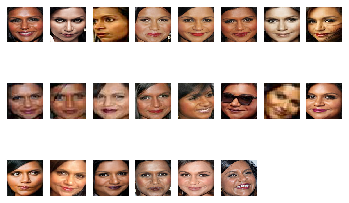

In [4]:
# This for loop takes the images path as parameter and iterate over files then calling the extract_face function
for filename in listdir(folder):
    # path
    path = folder + filename # creating the path of each image
    # get face
    face = extract_face(path) # extracting the face
    print(i, face.shape) # printing the shape of each image
    # plot
    pyplot.subplot(3, 8, i) # setting up the pyplot for plotting the face images. 3 row 8 column, i means that which image goes where
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1

In [6]:
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)# inserting the extracted face to a list
    return faces

In [7]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
    X, y = list(), list() # creaing 2 list 
    # enumerate folders, on per class
    for subdir in listdir(directory): # iterating over each folder
        # path
        path = directory + subdir + '/' # creating the path for each of the folders
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path) # sending the folders to the load faces functions. that functions send the path to the another function
        # create labels
        labels = [subdir for _ in range(len(faces))] # creating the label using the folder names
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir)) # printing the processed parts 
        # store
        X.extend(faces) # inserting the face list to the X list
        y.extend(labels) # insterting the labels to the y list
    return asarray(X), asarray(y) # return te X,y as numpy array

In [8]:
# load train dataset
trainX, trainy = load_dataset('5-celebrity-faces-dataset/train/')# passing the dataset path to the function and save the returned values
print(trainX.shape, trainy.shape) # printing the shape of the returned values
# load test dataset
testX, testy = load_dataset('5-celebrity-faces-dataset/val/') # passing the testing dataset path
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy) # saving the arrays for later uses as numpy file

>loaded 14 examples for class: ben_afflek
>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
>loaded 22 examples for class: mindy_kaling
(93, 160, 160, 3) (93,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
>loaded 5 examples for class: mindy_kaling
